In [1]:
system("mkdir ~/Documents/Epigenetica_curso_pipeline/EWAStools")
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")
basedir = getwd()
date="June4th2024"
dataDirectory <- ("/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata/")

# ******EWAStools******

https://hhhh5.github.io/ewastools/articles/exemplary_ewas.html

In [2]:
library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)
library(devtools)


Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


The following object is masked from ‘package:magrittr’:

    set_names


Loading required package: usethis



In [3]:


if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("illuminaio")
devtools::install_github("hhhh5/ewastools")

Bioconductor version '3.14' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install


Attaching package: ‘BiocManager’


The following object is masked from ‘package:devtools’:

    install


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.21), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'illuminaio'”
Old packages: 'AnnotationHub', 'askpass', 'backports', 'BH', 'BiocFileCache',
  'BiocManager', 'biomaRt', 'boot', 'brew', 'brio', 'broom', 'bslib', 'cachem',
  'callr', 'cli', 'cluster', 'codetools', 'commonmark', 'credentials',
  'crosstalk', 'crul', 'curl', 'data.table', 'DBI', 'dbplyr', 'desc', 'digest',
  'downlit', 'dplyr', 

rlang      (1.1.1  -> 1.1.4 ) [CRAN]
lifecycle  (1.0.3  -> 1.0.4 ) [CRAN]
glue       (1.6.2  -> 1.7.0 ) [CRAN]
cli        (3.6.1  -> 3.6.2 ) [CRAN]
vctrs      (0.6.2  -> 0.6.5 ) [CRAN]
igraph     (NA     -> 2.0.3 ) [CRAN]
data.table (1.14.8 -> 1.15.4) [CRAN]
mblm       (NA     -> 0.12.1) [CRAN]


Skipping 1 packages not available: illuminaio

Installing 8 packages: rlang, lifecycle, glue, cli, vctrs, igraph, data.table, mblm

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpyZQlMb/remotes173a54969584e/hhhh5-ewastools-d76eb91/DESCRIPTION’
─  preparing ‘ewastools’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘ewastools/data-raw’
─  looking to see if a ‘data/datalist’ file should be added
     NB: this package now depends on R (>= 3.5.0)
     serialize/load version 3 cannot be read in older versions of R.
     File(s) containing such objects:
       ‘ewastools/R/sysdata.rda’
─  building ‘ewastools_1.7.2.tar.gz’
   


In [3]:
library(ewastools)

### 2.1 Ler o pheno file criado na etapa anterior (GEOdata)

In [6]:
sheet = read.csv("~", header= T)

head(sheet)

GeoID      SampleID            Basename                       Sentrix_ID  
1 GSM8288007 204963470004_R01C01 GSM8288007_204963470004_R01C01 204963470004
2 GSM8288008 204963470004_R02C01 GSM8288008_204963470004_R02C01 204963470004
3 GSM8288009 204963470004_R03C01 GSM8288009_204963470004_R03C01 204963470004
4 GSM8288010 204963470004_R04C01 GSM8288010_204963470004_R04C01 204963470004
5 GSM8288011 204963470004_R05C01 GSM8288011_204963470004_R05C01 204963470004
6 GSM8288012 204963470004_R06C01 GSM8288012_204963470004_R06C01 204963470004
  Sentrix_Position Sex
1 R01C01           m  
2 R02C01           m  
3 R03C01           m  
4 R04C01           m  
5 R05C01           m  
6 R06C01           m

### 2.2 Criar meth file 
**read_idat()**

Está função irá importar os dados de metilação contidos em cada arquivo idat. 

> <span style="color: green;">Grn :</span> canal verde

> <span style="color: red;">Red :</span> canal vermelho

Para isso, é preciso passar a função um argumento contendo o caminho absoluto ou relativo de cada arquivo idat, com excessao das cores de cada canal.

Ex: GSM8258459_200889820015_R02C01

In [9]:
#create the meth file
head(paste(dataDirectory,sheet$Basename,sep="/"))


if("methdata.RData" %in% list.files("./output")){
    load("./output/methdata.RData")
    }else{
    meth = read_idats(paste(dataDirectory,sheet$Basename,sep = "/"))
    }

[1] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288007_204963470004_R01C01"
[2] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288008_204963470004_R02C01"
[3] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288009_204963470004_R03C01"
[4] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288010_204963470004_R04C01"
[5] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288011_204963470004_R05C01"
[6] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata//GSM8288012_204963470004_R06C01"

### 2.3 Salvar arquivo de metilação

In [8]:
system("mkdir ./output")
save(meth,sheet,file="output/methdata.RData")

In [13]:
ls()

[1] "basedir"       "dataDirectory" "date"          "meth"         
[5] "sheet"

***
**OBSERVAÇÃO:**
***
#### - STDIN/STDOUT

O símbolo abaixo
> %>%

É um simbolo inegrado pelo pacote magrittr para a criação de *pipes*. Resimudamente, ele pega o output de uma função ou de um conjunto de dados e insere na entrada padrão da próxima.


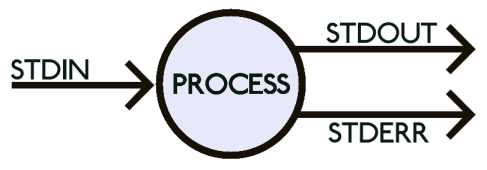
***

In [146]:
sheet = as.data.table(sheet)
sheet[,exclude:=FALSE]
meth %>% control_metrics %>% sample_failure -> sheet$failed
fails <- subset(sheet, failed == "TRUE")
message("Failed Samples: ", nrow(fails))

Failed Samples: 0



### 2.4 Preprocessamento - detection P-vals, dye-bias correction e conversão em beta

Segundo os próprios autores do pacote, é possível realizar toda essa etapa em uma só linha, como o exemplo abaixo:

    > beta = meth %>% detectionP %>% mask(0.01) %>% correct_dye_bias %>% dont_normalize

Entretando, podemos fazer passo a passo para explicar o que cada etapa está realizando

### i) Detection P value

O primeiro passo é filtrar pontos não confiáveis dos dados, que podem resultar de pontos de baixa intensidade de fluorescência durante o experimento com o chip. Essa baixa intensidade pode surgir, por exemplo, de baixa densidade de DNA amplificado na amostra.

#### detectionP()
Essa função irá comparar as intensidades de fluorescência com uma amostra de istribuição de *noise*. Probes que ficarem abaixo de uma significância escolhida serão mantidas (não-detectadas), enquanto **aquelas que ultrapassarem o ponto-de-corte, serão excluídas.**


#### detectionP.neg()
Por fins de comparação, utilizaremos a função **detection.neg()** que calcula da forma convencional como o GenomeStudio. Segundo os autores do ***ewastools***, a forma convencional permite a passagem de várias probes não confiáveis. Ainda, os autores demonstram isso pelo fato de que diversas probes do cromossomos Y são classificadas como detectadas.

O ewastools imprementa uma estimação mais poderosas dos *noise levels* que melhora a acurácia.

### <span style="color: red;">VERIFICAR A PARTE ABAIXO</span>

In [147]:

meth %<>% detectionP()
P.new = meth$detP

P.neg = meth %>% detectionP.neg %$% detP

chrY = meth$manifest[chr=='Y',index]

male = which(sheet$Sex=="m")[1]
female = which(sheet$Sex=="f")[1]

P.neg = P.neg[chrY,c(male,female)]
P.new = P.new[chrY,c(male,female)]

P.neg = colSums(P.neg<0.01,na.rm=TRUE)
P.new = colSums(P.new<0.01,na.rm=TRUE)

names(P.neg) = c("male","female")
names(P.new) = c("male","female")

Podemos ver a melhora da acurácia contando o número de cromossomos Y 
We can see the improved accuracy by counting the number of Y chromosome probes that are called detected for a male and a female samples.

In [148]:
print(P.neg)
print(P.new)

  male female 
   537    537 
  male female 
   533    126 


#### mask()

Por padrão, a função detectionP utiliza 0.01 como ponto de corte. Sendo assim, podemos utilizar a função **mask()** para excluir probes que estiverem acima desse ponto de corte.

In [149]:
beta = meth %>% mask(0.01)

### ii) *Dye-Bias*
#### correct_dye_bias()

Os BeadChips Infinium usam dois corantes fluorescentes que estão ligados aos nucleotídeos.<span style="color: red;"> Os nucleotídeos A e T são ligados com um corante vermelho</span> (o canal de cor vermelha), <span style="color: green;">os nucleotídeos G e C são ligados com um corante verde </span> (canal de cor verde). 
#### - O que é o ***dye-bias?***
Dados não corrigidos para *dye-bias* geralmente apresentam intensidades mais altas no canal de cor vermelha. Para sondas do tipo II de design Infinium, que usam canais de cor separados para medir o sinal metilado e não metilado, isso resulta em uma distribuição deslocada de valores beta. (As sondas do tipo I de design Infinium não são afetadas, pois medem ambos os sinais no mesmo canal de cor.) A correção do viés de cor normaliza o canal de cor vermelha e verde. O ewastools fornece uma versão aprimorada do RELIC (Xu et al., 2017) usando estimadores robustos de Theil-Sen.

In [150]:
beta %<>% correct_dye_bias

### dont_normalize()

A etapa final dp pré-processamento é a transformação das intensidades dos canais em valores de beta. Por padrão, o *ewastools* implementa LOESS normalization. Porém, há casos em que é interessante avaliar os valores de beta pré normalização. Dessa forma, podemos utilizar a função dont_normalize() para obter os valores "crus" de beta (***raw betas***)

In [151]:
beta %<>% dont_normalize()

save(beta,file="output/raw_beta.RData")

#Liberar espaço na memória
rm(beta)

### Quality Checks
### 2.5 Separar indivíduos que falharam nas métricas de controle

#### control_metrics()

Essa função verifica as 17 métricas estipuladas pela illumina em [BeadArray Controls Reporter Software Guide](https://link-url-here.org). Um exemplo é a conversão de Bisulfito.

No presente exemplo, vemos que não houve a perda de nenhuma amostra nesta etapa.

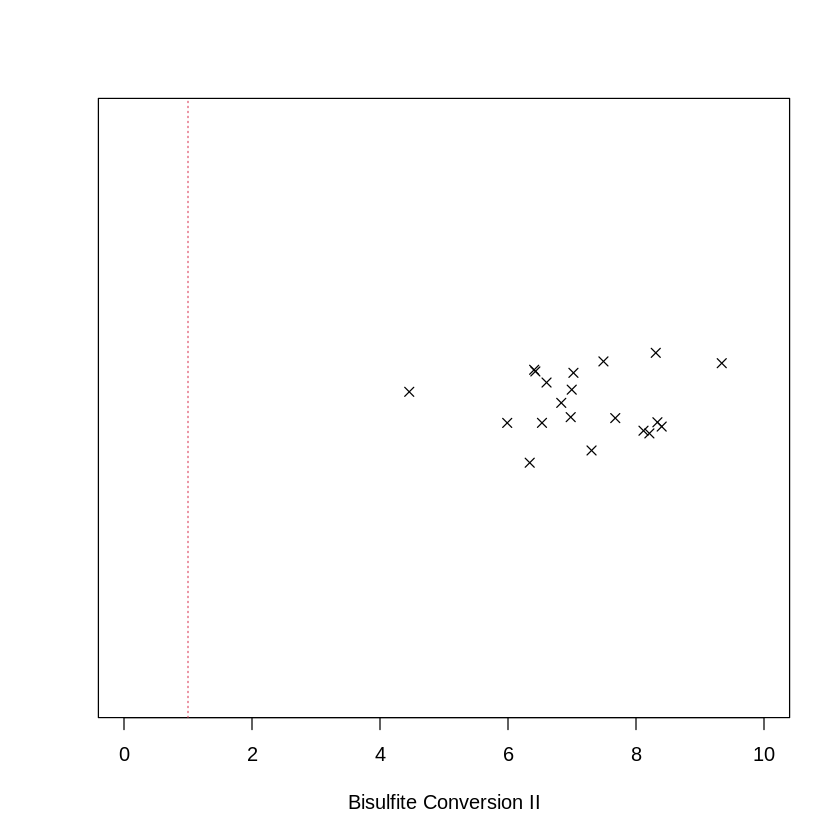

In [152]:
ctrls = control_metrics(meth)
stripchart(ctrls$`Bisulfite Conversion II`,method="jitter",pch=4,xlab='Bisulfite Conversion II',xlim=c(0,10))
abline(v=1,col=2,lty=3)

#### sample_failure()
Um vetor booleano (TRUE/FALSE) é obtido a partir da função **sample_failure()** com base nas 17 métricas do Illumina BeadArray control. Sendo assim, amostras marcadas como TRUE falharam, enquanto que amostas marcadas como FALSE, **não falharam** e por isso estão aptas a continuar.

In [153]:
sheet$failed = sample_failure(ctrls)
table(sheet$failed)


FALSE 
   20 

### Sex mismatches

Com base nas informações de metilação é possivel inferir o sexo da amostra. Isso é feito através de duas funções a **predict_sex()** e a **check_sex()**.

#### check_sex()
Esta função computa a média normalizada de fluorescência total das probes do cromossomo X e Y.

#### predict_sex()
A função predict_sex() utiliza o output da função check_sex() e compara com o sexo autodeclarado na planilha de fenótipos. Feita essa comparação, amostras ambíguas (sexo declarado diferente do sexo predito) são excluídas.

##### Importante
> ESse teste defe ser feito usando intensidades corrigidas por *dye-bias* **antes** de mascarar probes não detectadas, já que esse passo pode mascarar várias probes do cromossomo Y que são usadas nessa etapa

f     m 
114.0 535.5

   
    m f
  f 0 4
  m 7 0

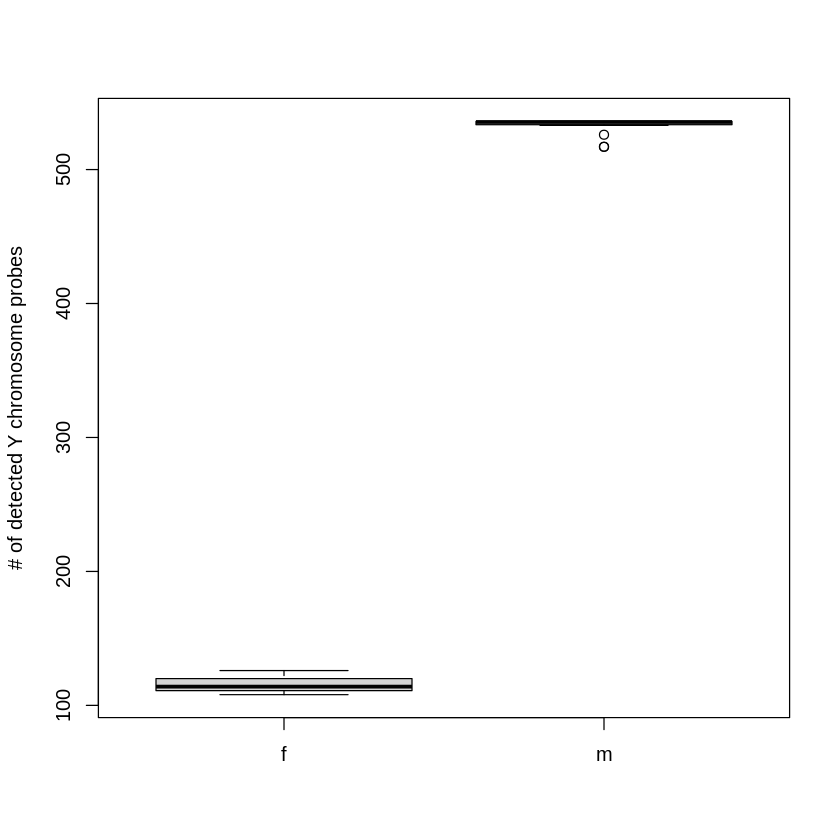

In [154]:
# 1. Obter o detectionP dos dados de metilação originais
detP = meth$detP[chrY,]

# 2. Calcular a quantidade das colunas de detP de cada indivíduo que obtem valor menor que 0.01 para o cromossomo Y
detP = colSums(detP<0.01,na.rm=TRUE)

# 3. Realizar um boxplot mostrando a distribução de detP < 0.01 em homens e mulheres ( de acordo com sexo biológico autodeclarado)
boxplot(split(detP,sheet$Sex),ylab="# of detected Y chromosome probes")

# 4. Calcuando a mediana das distribuições nas subamostras de homens e mulhres
split(detP,sheet$Sex) %>% sapply(median)


#------------------------------------------
#Aplicando as funções check_sex e predict_sex
sexpred = check_sex(meth) 
PredSex = predict_sex(sexpred$X, sexpred$Y)

sheet$predSex_X = sexpred$X
sheet$predSex_Y = sexpred$Y
sheet$predSex = PredSex

table(sheet$Sex,sheet$predSex)

#### Clusterização 

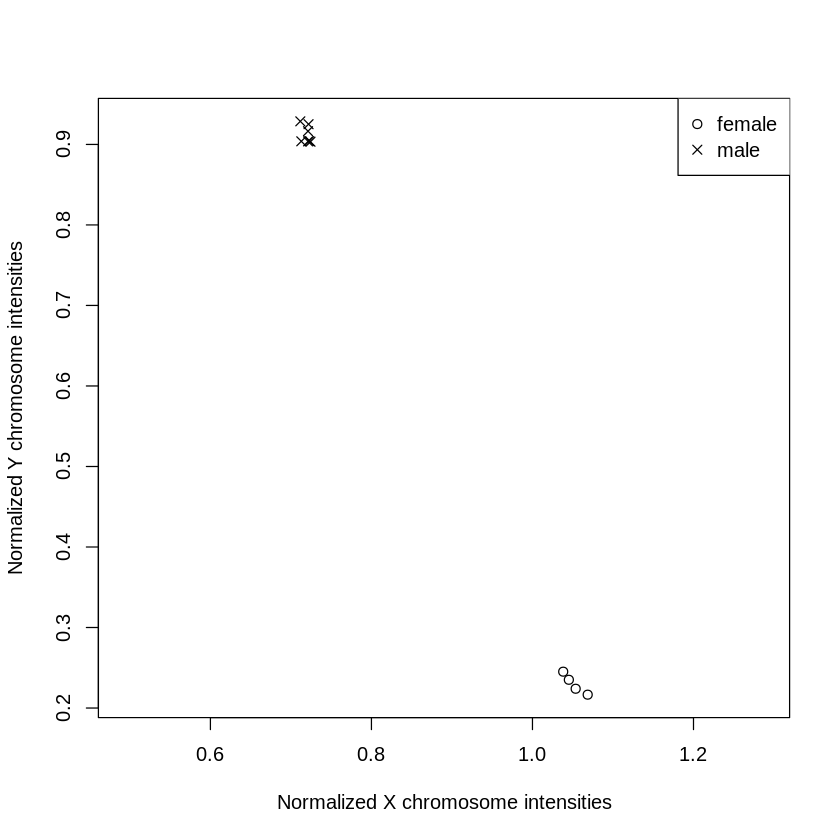

In [155]:
tmp = sheet[sheet$predSex==sheet$Sex]
plot(predSex_Y ~ predSex_X,data=tmp,pch=ifelse(tmp$Sex=="f",1,4),asp=1,xlab="Normalized X chromosome intensities",
     ylab="Normalized Y chromosome intensities")
#tmp = sheet[predSex!=Sex]
#points(predSex_Y ~ predSex_X,data=tmp,pch=ifelse(tmp$Sex=="f",1,4),col=2)
legend("topright",pch=c(1,4),legend=c("female","male"))

Caso hajam amostras com **mismatch** entre os sexos predito e relatado, estas serão taggeadas.

In [156]:
sheet=as.data.table(sheet)

In [157]:
sheet[Sex!=predSex,exclude:=TRUE] # flag sample
sheet[Sex!=predSex,.(SampleID,Sex,predSex)]


SampleID Sex predSex

***
### 2.6 Chamada de variante (*Genotype calling*) e outliers

Para a próxima etapa, preccisaremos dos *row index* dos SNPS no beta. O objeto **meth**, output da função read_idat< contem uma tabela com informações relevantes sobre isso

In [158]:
head(meth$manifest)

probe_id   addressU addressM channel next_base chr mapinfo strand probe_type
1 rs10796216 84632581 77745366 Red     A             NA             rs        
2 rs2468330  55653201       NA Both                  NA             rs        
3 rs213028   31661197  3637210 Red     T             NA             rs        
4 rs951295    1777132 81605941 Grn     C             NA             rs        
5 rs877309   79696145       NA Both                  NA             rs        
6 rs3936238  62607574 25691590 Red     T             NA             rs        
  index OOBi Ui     Mi    
1 1      1   838215 750840
2 2     NA   536638 536638
3 3      2   317353  29827
4 4      1    11375 796912
5 5     NA   774979 774979
6 6      3   597987 263775

***
### Procurar SNP-probes
As SNP-probes estão taggeadas com **"rs"** 
***

In [159]:
load("./output//raw_beta.RData")

snps = meth$manifest[probe_type=="rs",index]
snps = beta[snps,]

***
Cabeçalhos da tabela de SNP-probes
***

In [160]:
head(snps)

GSM8288007_204963470004_R01C01 GSM8288008_204963470004_R02C01
rs10796216 0.47011309                     0.46680182                    
rs2468330  0.04485112                     0.03911681                    
rs213028   0.03616891                     0.02027756                    
rs951295   0.05858203                     0.04880981                    
rs877309   0.50753953                     0.50499278                    
rs3936238  0.47232072                     0.47697038                    
           GSM8288009_204963470004_R03C01 GSM8288010_204963470004_R04C01
rs10796216 0.46923613                     0.45254128                    
rs2468330  0.05137249                     0.05201907                    
rs213028   0.02726195                     0.02088917                    
rs951295   0.06793546                     0.06724068                    
rs877309   0.50127798                     0.49457845                    
rs3936238  0.44037381                     0.46476788                    
           GSM8288011_204963470004_R05C01 GSM8288012_204963470004_R06C01
rs10796216 0.48189042                     0.46362016                    
rs2468330  0.05213481                     0.03492638                    
rs213028   0.50617682                     0.48387476                    
rs951295   0.51390957                     0.54928998                    
rs877309   0.03372087                     0.04878639                    
rs3936238  0.06513611                     0.05351722                    
           GSM8288013_204963470004_R07C01 GSM8288014_204963470004_R08C01
rs10796216 0.47294016                     0.44781055                    
rs2468330  0.05178291                     0.04587144                    
rs213028   0.47906392                     0.49790335                    
rs951295   0.55110181                     0.56143503                    
rs877309   0.04053062                     0.04044522                    
rs3936238  0.04892925                     0.04727374                    
           GSM8288015_204963470068_R01C01 GSM8288016_204963470068_R02C01
rs10796216 0.03677563                     0.04008231                    
rs2468330  0.05576054                     0.04702868                    
rs213028   0.02319146                     0.03158357                    
rs951295   0.53329639                     0.54524327                    
rs877309   0.52031634                     0.51851965                    
rs3936238  0.45706473                     0.46891538                    
           GSM8288017_204963470068_R03C01 GSM8288018_204963470068_R04C01
rs10796216 0.04991763                     0.03549849                    
rs2468330  0.04012263                     0.05027684                    
rs213028   0.02260452                     0.02067119                    
rs951295   0.51449529                     0.56150830                    
rs877309   0.52039596                     0.52777399                    
rs3936238  0.46875000                     0.46359438                    
           GSM8288019_204963470068_R05C01 GSM8288020_204963470068_R06C01
rs10796216 0.96243400                     0.95804345                    
rs2468330  0.48053599                     0.48409866                    
rs213028   0.02244986                     0.02843444                    
rs951295   0.95919642                     0.96851071                    
rs877309   0.95449470                     0.95495140                    
rs3936238  0.47638240                     0.47079170                    
           GSM8288021_204963470068_R07C01 GSM8288022_204963470068_R08C01
rs10796216 0.95428797                     0.95077990                    
rs2468330  0.46529187                     0.42758330                    
rs213028   0.02810853                     0.02586558                    
rs951295   0.96704291                     0.96621869                    
rs877309   0.94035944                     0.95024833                 

### call_genotypes()

Esses SNPs encontrados são usados como input para a função **call_genotypes()**. Essa função estima os parametros de um *mixture-model* que consistem de 3 distribuições de beta representando os **heterozigotos** e os **dois genṕtipos homozigotos**. Ainda, há um 4º componente, uma distribuição uniforme representando os **outliers**.

#### argumento *"learn=FALSE"*
Quando especificado, um modelo pré especificado é utilizado. Nesse caso, assim como no tutorial do *eewastools*, usaremos esse argumento já que a amostra é pequena e a estimação *maximum likelyhood* pode ser instável.



In [161]:
genotypes = call_genotypes(snps,learn=FALSE)
sheet

GeoID      SampleID            Basename                       Sentrix_ID  
1  GSM8288007 204963470004_R01C01 GSM8288007_204963470004_R01C01 204963470004
2  GSM8288008 204963470004_R02C01 GSM8288008_204963470004_R02C01 204963470004
3  GSM8288009 204963470004_R03C01 GSM8288009_204963470004_R03C01 204963470004
4  GSM8288010 204963470004_R04C01 GSM8288010_204963470004_R04C01 204963470004
5  GSM8288011 204963470004_R05C01 GSM8288011_204963470004_R05C01 204963470004
6  GSM8288012 204963470004_R06C01 GSM8288012_204963470004_R06C01 204963470004
7  GSM8288013 204963470004_R07C01 GSM8288013_204963470004_R07C01 204963470004
8  GSM8288014 204963470004_R08C01 GSM8288014_204963470004_R08C01 204963470004
9  GSM8288015 204963470068_R01C01 GSM8288015_204963470068_R01C01 204963470068
10 GSM8288016 204963470068_R02C01 GSM8288016_204963470068_R02C01 204963470068
11 GSM8288017 204963470068_R03C01 GSM8288017_204963470068_R03C01 204963470068
12 GSM8288018 204963470068_R04C01 GSM8288018_204963470068_R04C01 204963470068
13 GSM8288019 204963470068_R05C01 GSM8288019_204963470068_R05C01 204963470068
14 GSM8288020 204963470068_R06C01 GSM8288020_204963470068_R06C01 204963470068
15 GSM8288021 204963470068_R07C01 GSM8288021_204963470068_R07C01 204963470068
16 GSM8288022 204963470068_R08C01 GSM8288022_204963470068_R08C01 204963470068
17 GSM8288023 204963470085_R01C01 GSM8288023_204963470085_R01C01 204963470085
18 GSM8288024 204963470085_R02C01 GSM8288024_204963470085_R02C01 204963470085
19 GSM8288025 204963470085_R03C01 GSM8288025_204963470085_R03C01 204963470085
20 GSM8288026 204963470085_R04C01 GSM8288026_204963470085_R04C01 204963470085
   Sentrix_Position Sex exclude failed predSex_X predSex_Y predSex
1  R01C01           m   FALSE   FALSE  0.7220671 0.9020670 NA     
2  R02C01           m   FALSE   FALSE  0.7163131 0.8996749 NA     
3  R03C01           m   FALSE   FALSE  0.7212280 0.9164279 m      
4  R04C01           m   FALSE   FALSE  0.7204348 0.8963153 NA     
5  R05C01           m   FALSE   FALSE  0.7264209 0.9053138 NA     
6  R06C01           m   FALSE   FALSE  0.7116652 0.9286768 m      
7  R07C01           m   FALSE   FALSE  0.7128754 0.9038830 m      
8  R08C01           m   FALSE   FALSE  0.7036737 0.8962277 NA     
9  R01C01           m   FALSE   FALSE  0.7269025 0.9050406 NA     
10 R02C01           m   FALSE   FALSE  0.7227573 0.9041457 m      
11 R03C01           m   FALSE   FALSE  0.7243087 0.9033526 m      
12 R04C01           m   FALSE   FALSE  0.7212942 0.9037724 m      
13 R05C01           f   FALSE   FALSE  1.0685831 0.2165931 f      
14 R06C01           f   FALSE   FALSE  1.0536520 0.2239476 f      
15 R07C01           f   FALSE   FALSE  1.0451904 0.2350801 f      
16 R08C01           f   FALSE   FALSE  1.0381758 0.2451499 f      
17 R01C01           m   FALSE   FALSE  0.7287399 0.9307857 NA     
18 R02C01           m   FALSE   FALSE  0.7218800 0.9251344 m      
19 R03C01           m   FALSE   FALSE  0.7294284 0.9188304 NA     
20 R04C01           m   FALSE   FALSE  0.7262667 0.9038583 NA

***
### snp_outliers()

A função **snp_outliers()** retorna a média de log odds de permitir ao componente (distribuição) dos outliers dentre todas as SNP-probes. É recomendado excluir amostras com o escore (pontuação) maior que -4 


In [162]:
sheet$outlier = snp_outliers(genotypes)
sheet[outlier > -4,.(SampleID,predSex_X,predSex_Y,outlier)]
sheet[outlier > -4,exclude:=TRUE] # flag sample

SampleID predSex_X predSex_Y outlier

Olhando na *phenotype sheet*, podemos observar que não há indivíduos para serem excluídos por outlier
***

## Outras funções uteis

### check_snp_agreement()

Verifica se os genótipos de amostras supostamente provenientes do mesmo doador (ou de gêmeos monozigóticos) de fato concordam

### enmerate_sample_donros()

retorna IDs exclusivos para genótipos exclusivos e pode, por exemplo, ser usado para encontrar réplicas técnicas em conjuntos de dados públicos.

***

In [163]:
sheet$donor_id = enumerate_sample_donors(genotypes)

# List duplicates
sheet[,n:=.N,by=donor_id]
sheet[n>1,.(SampleID,donor_id)]
#pheno[gsm=="GSM2260543",exclude:=TRUE] # drop duplicate

SampleID            donor_id
1  204963470004_R01C01 1       
2  204963470004_R02C01 1       
3  204963470004_R03C01 1       
4  204963470004_R04C01 1       
5  204963470004_R05C01 2       
6  204963470004_R06C01 2       
7  204963470004_R07C01 2       
8  204963470004_R08C01 2       
9  204963470068_R01C01 3       
10 204963470068_R02C01 3       
11 204963470068_R03C01 3       
12 204963470068_R04C01 3       
13 204963470068_R05C01 4       
14 204963470068_R06C01 4       
15 204963470068_R07C01 4       
16 204963470068_R08C01 4       
17 204963470085_R01C01 5       
18 204963470085_R02C01 5       
19 204963470085_R03C01 5       
20 204963470085_R04C01 5

***
### Obs: 
Nesta amostra, 5 indivíduos foram medidos 4 vezes em momentos diferentes (baseline, trainamento, destreinamento e retreinamento). Por isso, possuímos quadriplicatas destes 5 indivíduos.
***

### PCA - Principal Component Analysis

Análise de componentes principais é uma técnica que projeta dados *high-dimensional* em uma representação com menos dimenções tentando reter o máximo de variabilidade possível. É especialmente útil quando características individuais são altamente correlacionadas e, portanto, é razoável resumi-las, ou quando traços (às vezes sutis) de efeitos de fundo podem ser encontrados em um grande número de características.

Neste caso, vamos reduzir os cromossomes X e Y como se quisessemos encontrar drivers importantes de metilação alem do sexo.

In [164]:
set.seed(982278)
chrXY = meth$manifest[chr%in%c("X","Y") & probe_type!="rs",index]
pcs = beta[-chrXY,]
pcs = pcs - rowMeans(pcs)
pcs = na.omit(pcs)
pcs = t(pcs)
pcs = prcomp(pcs) # compute the first two principal components #trlan.svd not designed to work with small matrix
head(pcs)

$sdev
 [1] 1.312791e+01 1.131376e+01 1.052472e+01 9.744639e+00 8.601949e+00
 [6] 7.061453e+00 5.708368e+00 5.284393e+00 4.733131e+00 4.466286e+00
[11] 4.158293e+00 4.107987e+00 3.961116e+00 3.833236e+00 3.676489e+00
[16] 3.622440e+00 3.594725e+00 3.469494e+00 3.256740e+00 1.178134e-14

$rotation
                           PC1           PC2           PC3           PC4
rs10796216       -9.905936e-03 -2.366616e-02 -3.487243e-03 -4.695066e-03
rs2468330        -1.449746e-02 -1.175958e-02 -1.294046e-02 -1.838653e-02
rs213028         -9.078175e-04 -3.493641e-03  1.046308e-02 -1.986811e-02
rs951295          8.267452e-03 -1.688979e-02 -1.504926e-02 -6.800248e-03
rs877309          4.225132e-03 -8.153036e-03 -1.901710e-02  2.726089e-02
rs3936238        -1.593069e-02  2.174078e-03 -1.444053e-02 -7.280238e-03
rs2857639        -2.477962e-03  1.320141e-02 -1.979059e-02  6.016945e-03
rs798149          1.220286e-02  2.610549e-02  2.213368e-02  1.102292e-02
rs939290          1.718878e-03  2.021324e-03  2.013354e-02  6.594941e-03
rs6991394         8.000869e-03 -1.210616e-02  3.362378e-03  4.502866e-04
rs9839873         1.926985e-04  6.781961e-04  1.758019e-04  2.916574e-04
rs739259          2.057746e-03  6.759721e-03  1.023879e-03 -1.879826e-02
rs1520670         1.478416e-03  7.670233e-03 -2.899361e-02 -7.930408e-03
rs11034952        8.210822e-03  1.967928e-02  1.211809e-02 -1.477219e-02
rs133860          5.831280e-03 -5.145025e-03 -7.271310e-03 -1.328608e-02
rs9292570         1.249583e-02 -7.298449e-03  4.368774e-03 -1.955463e-02
rs7746156        -6.680669e-03  1.139594e-03  1.784861e-02 -6.443948e-03
rs1941955         1.898586e-02 -1.560953e-02  7.108983e-03  1.271714e-02
rs2385226         2.243460e-04  2.160503e-03  6.706998e-04 -2.904714e-04
rs1484127        -1.558206e-04 -2.671250e-04 -6.586180e-04 -5.581476e-04
rs2235751         6.717843e-05 -1.851105e-02 -9.294182e-03  2.581984e-02
rs6982811         1.777146e-02  5.172473e-03 -1.271232e-02 -1.279030e-03
rs2125573        -1.326189e-02  4.266098e-03  3.662392e-03  8.421965e-04
rs1040870         3.294807e-03 -8.716220e-03 -1.797078e-02  2.404154e-02
rs10882854       -1.133625e-02 -7.952088e-03 -3.899932e-03  8.506009e-03
rs845016          1.900637e-03 -1.247053e-02  2.167720e-03 -9.833198e-03
rs4742386        -1.394166e-03  1.524927e-02 -1.424468e-03  1.150267e-02
rs5987737        -6.847819e-03  8.768766e-03 -3.011668e-02 -1.962410e-02
rs1019916        -1.961744e-03 -1.648038e-03 -1.802446e-02 -5.684560e-03
rs13369115       -8.311101e-03  1.733624e-02 -1.372308e-02  1.728178e-02
rs9363764        -2.186881e-03  1.179823e-02  8.032916e-03 -7.160451e-03
rs472920          1.570288e-02  1.088607e-03 -4.246186e-03 -2.170353e-02
rs2208123         1.538040e-02 -3.149617e-03  1.316305e-02  6.056080e-03
rs6471533        -1.062384e-02  1.581037e-02 -5.460002e-03 -2.872934e-04
rs1510189         1.951071e-02  7.818961e-03  6.094447e-03  3.250545e-03
rs715359         -2.895883e-04  1.419968e-02  2.881240e-02 -6.415791e-04
rs6426327         7.006540e-03 -3.114121e-03  1.248963e-02 -6.509614e-03
rs1416770        -7.423832e-03 -2.135668e-02  1.748755e-02  2.336449e-03
rs10033147        2.676335e-03 -1.338618e-02  2.136134e-02 -5.107552e-03
rs2959823         3.099982e-03  7.052563e-03  1.289991e-03 -1.797676e-02
rs5926356        -9.920676e-03  8.337575e-03  1.398069e-02  2.332865e-02
rs2804694         2.254465e-02 -4.748853e-03 -2.282404e-03  1.146762e-02
rs2032088         1.964116e-03  1.978257e-03  1.863473e-02  5.909714e-03
rs4331560        -1.093626e-02 -2.013414e-03 -2.061304e-02 -1.898842e-02
rs11249206        3.059308e-03 -1.211332e-02 -8.024545e-03  7.126240e-03
rs1510480         1.090437e-02 -1.700378e-02  4.779460e-03  9.148405e-04
rs264581         -9.279508e-03  2.011260e-02 -2.221617e-02 -2.689056e-02
rs6546473        -2.101034e-03  1.183225e-02  8.089965e-03 -7.671057e-03
rs6626309        -1.036069e-02  9.055942e-03  1.427409e-02  2.458667e-02
rs654498         -2.381190e-04 -2.026406e-02  2.05378

***

Adicionamos os PC's 1 e 2 a tabela de fenótipos

***

In [165]:
sheet$pc1 = pcs$x[,1]
sheet$pc2 = pcs$x[,2]

sheet

GeoID      SampleID            Basename                       Sentrix_ID  
1  GSM8288007 204963470004_R01C01 GSM8288007_204963470004_R01C01 204963470004
2  GSM8288008 204963470004_R02C01 GSM8288008_204963470004_R02C01 204963470004
3  GSM8288009 204963470004_R03C01 GSM8288009_204963470004_R03C01 204963470004
4  GSM8288010 204963470004_R04C01 GSM8288010_204963470004_R04C01 204963470004
5  GSM8288011 204963470004_R05C01 GSM8288011_204963470004_R05C01 204963470004
6  GSM8288012 204963470004_R06C01 GSM8288012_204963470004_R06C01 204963470004
7  GSM8288013 204963470004_R07C01 GSM8288013_204963470004_R07C01 204963470004
8  GSM8288014 204963470004_R08C01 GSM8288014_204963470004_R08C01 204963470004
9  GSM8288015 204963470068_R01C01 GSM8288015_204963470068_R01C01 204963470068
10 GSM8288016 204963470068_R02C01 GSM8288016_204963470068_R02C01 204963470068
11 GSM8288017 204963470068_R03C01 GSM8288017_204963470068_R03C01 204963470068
12 GSM8288018 204963470068_R04C01 GSM8288018_204963470068_R04C01 204963470068
13 GSM8288019 204963470068_R05C01 GSM8288019_204963470068_R05C01 204963470068
14 GSM8288020 204963470068_R06C01 GSM8288020_204963470068_R06C01 204963470068
15 GSM8288021 204963470068_R07C01 GSM8288021_204963470068_R07C01 204963470068
16 GSM8288022 204963470068_R08C01 GSM8288022_204963470068_R08C01 204963470068
17 GSM8288023 204963470085_R01C01 GSM8288023_204963470085_R01C01 204963470085
18 GSM8288024 204963470085_R02C01 GSM8288024_204963470085_R02C01 204963470085
19 GSM8288025 204963470085_R03C01 GSM8288025_204963470085_R03C01 204963470085
20 GSM8288026 204963470085_R04C01 GSM8288026_204963470085_R04C01 204963470085
   Sentrix_Position Sex exclude failed predSex_X predSex_Y predSex outlier  
1  R01C01           m   FALSE   FALSE  0.7220671 0.9020670 NA      -5.384165
2  R02C01           m   FALSE   FALSE  0.7163131 0.8996749 NA      -5.327044
3  R03C01           m   FALSE   FALSE  0.7212280 0.9164279 m       -5.188337
4  R04C01           m   FALSE   FALSE  0.7204348 0.8963153 NA      -5.335364
5  R05C01           m   FALSE   FALSE  0.7264209 0.9053138 NA      -5.351357
6  R06C01           m   FALSE   FALSE  0.7116652 0.9286768 m       -4.977270
7  R07C01           m   FALSE   FALSE  0.7128754 0.9038830 m       -5.365212
8  R08C01           m   FALSE   FALSE  0.7036737 0.8962277 NA      -5.201627
9  R01C01           m   FALSE   FALSE  0.7269025 0.9050406 NA      -5.296599
10 R02C01           m   FALSE   FALSE  0.7227573 0.9041457 m       -5.419038
11 R03C01           m   FALSE   FALSE  0.7243087 0.9033526 m       -5.421556
12 R04C01           m   FALSE   FALSE  0.7212942 0.9037724 m       -5.350756
13 R05C01           f   FALSE   FALSE  1.0685831 0.2165931 f       -5.442813
14 R06C01           f   FALSE   FALSE  1.0536520 0.2239476 f       -5.315823
15 R07C01           f   FALSE   FALSE  1.0451904 0.2350801 f       -5.279475
16 R08C01           f   FALSE   FALSE  1.0381758 0.2451499 f       -4.959613
17 R01C01           m   FALSE   FALSE  0.7287399 0.9307857 NA      -4.919693
18 R02C01           m   FALSE   FALSE  0.7218800 0.9251344 m       -5.168973
19 R03C01           m   FALSE   FALSE  0.7294284 0.9188304 NA      -5.122641
20 R04C01           m   FALSE   FALSE  0.7262667 0.9038583 NA      -5.234481
   donor_id n pc1         pc2        
1  1        4  -4.5362450   7.4849003
2  1        4 -13.8408036   4.6753746
3  1        4  -9.2851271   6.4018440
4  1        4 -10.2311115   8.1363797
5  2        4  17.7684093  -0.1295719
6  2        4   6.1642199 -10.9992003
7  2        4  12.2960022  -2.3005834
8  2        4  17.3462278  -2.9939941
9  3        4  13.2254859  15.7578442
10 3        4   2.6477212  13.2745539
11 3        4   5.8620750  14.1358946
12 3        4   5.8945228  14.3293599
13 4        4  13.8865136 -10.4597775
14 4        4   1.0246681 -13.5036066
15 4        4   3.4994768 -16.2792788
16 4        4   0.6058483 -25.5926304
17 5        4  -3.3498237   0.8449721
18 5        4 -33.9091406  -7.4358869
19 5        4  -4.3840076 

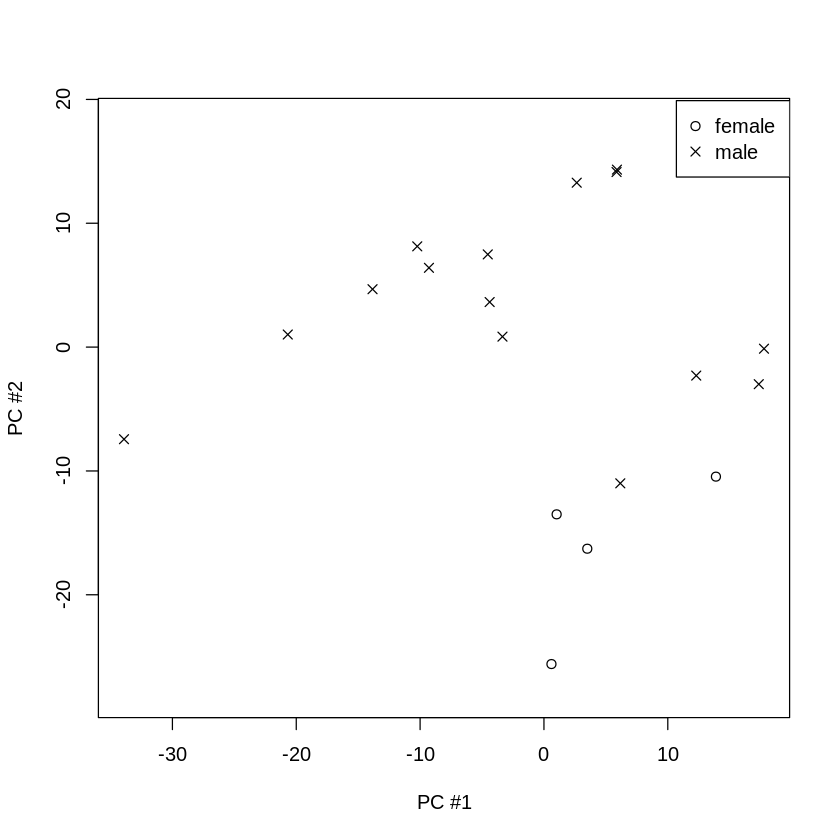

In [166]:
plot(pc2 ~ pc1,pch=ifelse(Sex=="f",1,4),sheet,asp=1,xlab="PC #1",ylab="PC #2")
legend("topright",pch=c(1,4),legend=c("female","male"))

In [167]:
#if you have clear outlier:
sheet[pc1< -0.8,exclude:=TRUE]
sheet[pc1< -0.8,.(SampleID,pc1,pc2)]

SampleID            pc1        pc2       
1 204963470004_R01C01  -4.536245  7.4849003
2 204963470004_R02C01 -13.840804  4.6753746
3 204963470004_R03C01  -9.285127  6.4018440
4 204963470004_R04C01 -10.231111  8.1363797
5 204963470085_R01C01  -3.349824  0.8449721
6 204963470085_R02C01 -33.909141 -7.4358869
7 204963470085_R03C01  -4.384008  3.6375804
8 204963470085_R04C01 -20.684912  1.0158260

***
### Composiçãpo leucocitária
#### estimateLC()

Essa etapa só se aplica em caso de amostras de sangue. A função estimateLC() implementa o ***método Houseman*** para predizer a composição leucocitária dos indivíduos. O analista tem vários modelos de parametros treinados em diferentes *datasets* (rode **?estimateLC()** para ver as opções)

##### LC 
LC contém as proporçõs esrtimadas para 7 tipos de células (a depender do dataset escolhido)

In [168]:
LC = estimateLC(beta,ref="deGoede+Reinius")
sheet = cbind(sheet,LC)
round(head(LC),3)


MO    B     CD4   CD8   GR    NK    nRBC 
1 0.128 0.122 0.114 0.096 0.004 0.009 0.663
2 0.167 0.108 0.120 0.089 0.004 0.018 0.626
3 0.137 0.128 0.141 0.063 0.005 0.016 0.632
4 0.150 0.117 0.141 0.062 0.000 0.033 0.627
5 0.119 0.125 0.161 0.048 0.000 0.048 0.665
6 0.140 0.121 0.159 0.038 0.007 0.045 0.629

***
## EWAS

Após a limpeza e pre-processamento dos dados, podemos partir para o verdadeiro **EWAS**. 

***
#### Importante!!!
Codificação correta das variáveis. Observar se há variáveis que devem ser transformadas em fatores, por exemplo sexo
> Variáveis discretas devem ser transformadas em fatores
> 
> **Exemplo**:
> * Fumantes/Não-fumantes;
> * Masculino/Feminino;
> * TDAH/Não-TDAH
> * ...
***

In [169]:
colnames(sheet)

[1] "GeoID"            "SampleID"         "Basename"         "Sentrix_ID"      
 [5] "Sentrix_Position" "Sex"              "exclude"          "failed"          
 [9] "predSex_X"        "predSex_Y"        "predSex"          "outlier"         
[13] "donor_id"         "n"                "pc1"              "pc2"             
[17] "MO"               "B"                "CD4"              "CD8"             
[21] "GR"               "NK"               "nRBC"

In [170]:
pheno = sheet[,.(
     GeoID
    ,sex = factor(Sex,levels=c("m","f")) # first level is the reference
    ,GR,MO,B,CD4,CD8,NK,nRBC
)]

#### Escolha do modelo

Para rodar a regressão linear com desfecho nos betas de metilação, devem ser escolhidas as variáveis as quais deseja-sep predizer o efeito sobre a metilação. Nese exemplo, serão incluidas apenas Sexo e as proporções celulares. Porém, caso seus dados clinicos possuam demais variáveis como tabagismo, diagnśtico de alguma condiçẽo ou transtorno, ou demais medias importantes, deve se levar em consideração a inclusão dessas variaáveis no modelo.



***
## ATENÇÃO
Neste modelo estamos rodando apenas com um porção limitada do beta para economizar tempo. Para rodar o modelo completamente substitua beta[1:10] por apenas beta
***

In [171]:
f = function(meth){
    m = lm(meth~1+sex+GR+MO+B+CD4+CD8+NK+nRBC,data=pheno)
    coef(summary(m))["sexf",4] # extract the p-value for the smoking
}


f = possibly(f,otherwise=NA_real_) # catch errors
pvals = apply(beta[1:10,],1,f)

pvals

rs10796216    rs2468330     rs213028     rs951295     rs877309    rs3936238 
3.071025e-03 1.273695e-03 1.947548e-02 3.286801e-04 1.263644e-05 4.164097e-03 
   rs2857639     rs798149     rs939290    rs6991394 
4.550597e-01 1.097610e-06 7.405248e-03 4.103960e-03

***
### Salvar os resultados

Após rodar a regressão, iremos criar uma tabela com cada SNP-probe, pval e qval(valor de p corrigido por FDR)
***

In [172]:

P_SEX = data.table(probe_id=rownames(beta[1:10,]),pval=pvals)
P_SEX %<>% na.omit
P_SEX[,qval:=p.adjust(pval,m="fdr")]
P_SEX = P_SEX[qval<0.05]
print(P_SEX)

save(P_SEX, file = "output/EWAStools_pvals.RData")

     probe_id         pval         qval
       <char>        <num>        <num>
1: rs10796216 3.071025e-03 5.948710e-03
2:  rs2468330 1.273695e-03 3.184238e-03
3:   rs213028 1.947548e-02 2.163943e-02
4:   rs951295 3.286801e-04 1.095600e-03
5:   rs877309 1.263644e-05 6.318221e-05
6:  rs3936238 4.164097e-03 5.948710e-03
7:   rs798149 1.097610e-06 1.097610e-05
8:   rs939290 7.405248e-03 9.256560e-03
9:  rs6991394 4.103960e-03 5.948710e-03
